## Ломаем тест Манна-Уитни

Придумаем пример, на котором тест Манна-Уитни не будет работать. 

__Hint:__ Главная предпосылка теста заключается в том, что распределение не меняется, но у него происходит сдвиг. Воспользуйтесь этим. 

\begin{equation*}
    \begin{aligned}
    & H_0: F_X(x) = F_Y(y) \\
    & H_A: F_X(x) = F_Y(y + m), m \ne 0
    \end{aligned}
\end{equation*}


In [1]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

Результаты тесты Манна-Уитни: MannwhitneyuResult(statistic=22822.0, pvalue=0.0)


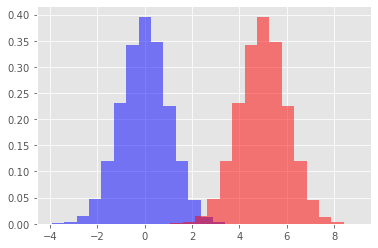

In [2]:
norm1 = sts.norm()
x1 = norm1.rvs(10000, random_state=42)

norm2 = sts.norm(loc=5)
x2 = norm2.rvs(10000, random_state=42)


plt.hist(x1, alpha=0.5, bins=15, density=True, color='blue')
plt.hist(x2, alpha=0.5, bins=15, density=True, color='red');

print(f"Результаты тесты Манна-Уитни: {sts.mannwhitneyu(x1, x2)}")

**Все ОК. Распределения одинаковые, только есть сдвиг. p-value < 0.05 => принимаем альтернативную гипотезу о наличии сдвига между распределениями**

Результаты тесты Манна-Уитни: MannwhitneyuResult(statistic=49997863.0, pvalue=0.9958245263778471)


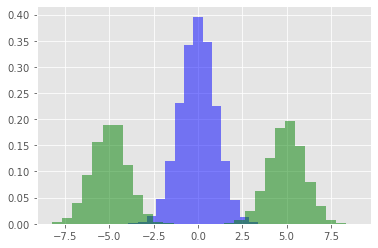

In [3]:
norm11 = sts.norm(loc=-5)
norm22 = sts.norm(loc=5)
x11 = norm11.rvs(5000, random_state=42)
x22 = norm22.rvs(5000, random_state=42)

x12 = np.concatenate([x11, x22])

plt.hist(x1, alpha=0.5, bins=15, density=True, color='blue')
plt.hist(x12, alpha=0.5, bins=30, density=True, color='green');

print(f"Результаты тесты Манна-Уитни: {sts.mannwhitneyu(x1, x12)}")

**НЕ ОК. Второе распределение имеет те же параметры, но сдвиги, которые поляризовали наблюдения.**


**p-value > 0.05 => принимаем основную гипотезу об отсутствии сдвига между распределениями, т.е. распределения абсолютно идентичны. Но распределения имеют сдвиг, просто в разные стороны. Тест Манна-Уитни нам это не показал и сломался**